In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile
import os

# Path to your zip file in Drive
zip_path = "/content/drive/My Drive/Colab Notebooks/DriverDrowsinessDataset.zip"

# Extract destination (inside Colab)
extract_path = "/content/dataset"

# Extract the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted successfully!")
print("Files and folders:", os.listdir(extract_path))


✅ Dataset extracted successfully!
Files and folders: ['Drowsy', 'Non Drowsy']


In [3]:
import os

data_path = "/content/dataset"
print("Subfolders:", os.listdir(data_path))


Subfolders: ['Drowsy', 'Non Drowsy']


In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [5]:
data_dir = "/content/dataset"  # change if your extracted folder name differs
train_dir = data_dir
print(os.listdir(train_dir))


['Drowsy', 'Non Drowsy']


In [6]:
# Data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% data for validation
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Validation data
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 33435 images belonging to 2 classes.
Found 8358 images belonging to 2 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 373s 355ms/step - accuracy: 0.8199 - loss: 0.3418 - val_accuracy: 0.7058 - val_loss: 1.2306
Epoch 2/20
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 346s 331ms/step - accuracy: 0.9902 - loss: 0.0299 - val_accuracy: 0.5934 - val_loss: 2.4967
Epoch 3/20
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 335s 320ms/step - accuracy: 0.9929 - loss: 0.0217 - val_accuracy: 0.6624 - val_loss: 1.5013
Epoch 4/20
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 333s 319ms/step - accuracy: 0.9968 - loss: 0.0112 - val_accuracy: 0.7350 - val_loss: 2.1771
Epoch 5/20
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 337s 322ms/step - accuracy: 0.9970 - loss: 0.0113 - val_accuracy: 0.6575 - val_loss: 1.9033
Epoch 6/20
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 339s 324ms/step - accuracy: 0.9962 - loss: 0.0137 - val_accuracy: 0.6817 - val_loss: 1.6111
Epoch 7/20
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 332s 318ms/step - accuracy: 0.9952 - loss: 0.0155 - val_accuracy: 0.7861 - val_loss: 1.5859
Epoch 8/20
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 394s 377ms/step - ac

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

Y_pred = model.predict(val_generator)
y_pred = (Y_pred > 0.5).astype(int)
print(confusion_matrix(val_generator.classes, y_pred))
print(classification_report(val_generator.classes, y_pred))


262/262 ━━━━━━━━━━━━━━━━━━━━ 47s 177ms/step
[[ 845 3624]
 [ 735 3154]]
              precision    recall  f1-score   support

           0       0.53      0.19      0.28      4469
           1       0.47      0.81      0.59      3889

    accuracy                           0.48      8358
   macro avg       0.50      0.50      0.44      8358
weighted avg       0.50      0.48      0.42      8358



In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)


In [11]:
class_weights = {0:1.3, 1:1.0}


In [12]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_generator, epochs=30, validation_data=val_generator)


Epoch 1/30
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 381s 364ms/step - accuracy: 0.9999 - loss: 3.5320e-04 - val_accuracy: 0.7802 - val_loss: 3.6944
Epoch 2/30
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 353s 336ms/step - accuracy: 0.9999 - loss: 6.2218e-04 - val_accuracy: 0.7527 - val_loss: 3.3624
Epoch 3/30
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 349s 334ms/step - accuracy: 1.0000 - loss: 4.7630e-04 - val_accuracy: 0.7815 - val_loss: 3.3261
Epoch 4/30
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 350s 335ms/step - accuracy: 1.0000 - loss: 1.4436e-04 - val_accuracy: 0.7790 - val_loss: 3.2271
Epoch 5/30
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 367s 351ms/step - accuracy: 1.0000 - loss: 2.8745e-04 - val_accuracy: 0.7854 - val_loss: 3.4769
Epoch 6/30
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 360s 345ms/step - accuracy: 0.9997 - loss: 3.9368e-04 - val_accuracy: 0.7923 - val_loss: 2.7721
Epoch 7/30
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 354s 339ms/step - accuracy: 0.9999 - loss: 5.6624e-04 - val_accuracy: 0.8021 - val_loss: 2.6693
Epoch 8/30
1045/1045 ━━━━━━━━━━━━━

In [22]:
# Evaluate model performance
val_loss, val_acc = model.evaluate(val_generator)
print(f"✅ Validation Accuracy: {val_acc*100:.2f}%")
print(f"✅ Validation Loss: {val_loss:.4f}")


262/262 ━━━━━━━━━━━━━━━━━━━━ 49s 186ms/step - accuracy: 0.7842 - loss: 3.9583
✅ Validation Accuracy: 79.18%
✅ Validation Loss: 3.7311


In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on validation data
Y_pred = model.predict(val_generator)
y_pred = (Y_pred > 0.5).astype(int).ravel()   # 0.5 threshold

# True labels
y_true = val_generator.classes


262/262 ━━━━━━━━━━━━━━━━━━━━ 53s 200ms/step


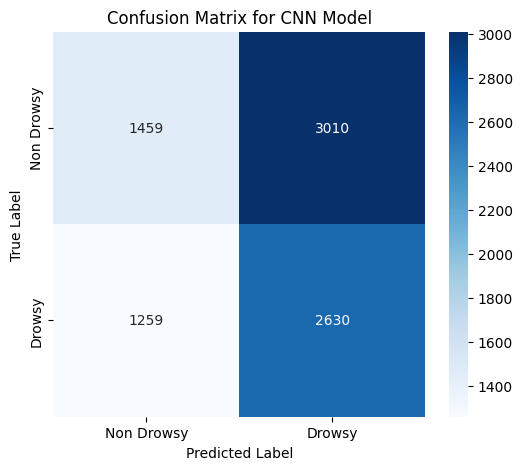

In [16]:
# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non Drowsy', 'Drowsy'], yticklabels=['Non Drowsy', 'Drowsy'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CNN Model')
plt.show()


In [24]:
# Print precision, recall, f1-score
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Non Drowsy', 'Drowsy']))



📊 Classification Report:
              precision    recall  f1-score   support

  Non Drowsy       0.54      0.36      0.43      4469
      Drowsy       0.47      0.64      0.54      3889

    accuracy                           0.49      8358
   macro avg       0.50      0.50      0.49      8358
weighted avg       0.51      0.49      0.48      8358



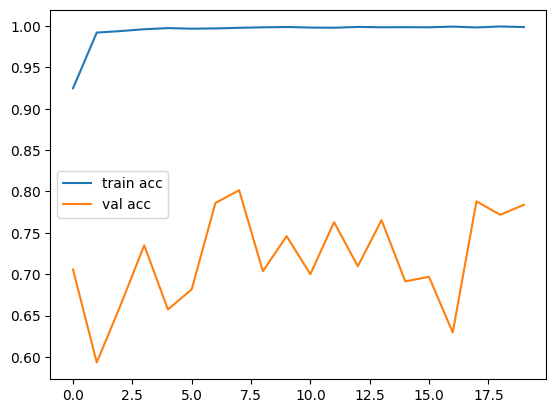

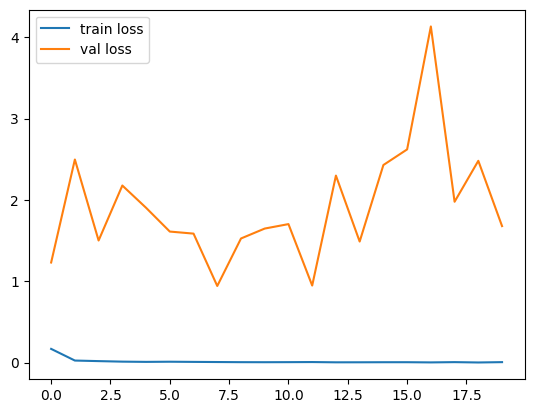

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64,64,3))
for layer in base_model.layers:
    layer.trainable = False  # freeze base layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/tmp/ipython-input-610504966.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64,64,3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.models import Model


base_model = model


feature_extractor = Model(inputs=base_model.input, outputs=base_model.layers[-3].output)


In [ ]:
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras.models import Model

# CNN এর শেষ dense layer এর আগ পর্যন্ত feature নিতে model তৈরি
feature_extractor = Model(inputs=model.input, outputs=model.layers[-3].output)

# Training data থেকে features নেওয়া
train_features = feature_extractor.predict(train_generator)
train_labels = train_generator.classes

# Validation data থেকে features নেওয়া
val_features = feature_extractor.predict(val_generator)
val_labels = val_generator.classes

print("✅ Features extracted successfully from CNN (64x64 input).")
print("Train feature shape:", train_features.shape)
print("Validation feature shape:", val_features.shape)


1045/1045 ━━━━━━━━━━━━━━━━━━━━ 257s 245ms/step
262/262 ━━━━━━━━━━━━━━━━━━━━ 58s 222ms/step
✅ Features extracted successfully from CNN (64x64 input).
Train feature shape: (33435, 64)
Validation feature shape: (8358, 64)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Dictionary তে সব classifier list করা
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gaussian NB": GaussianNB()
}

results = {}

# প্রতিটা model train ও evaluate করা
for name, clf in models.items():
    print(f"\n🔹 Training {name}...")
    clf.fit(train_features, train_labels)

    preds = clf.predict(val_features)
    acc = accuracy_score(val_labels, preds)
    results[name] = acc

    print(f"✅ {name} Accuracy: {acc:.4f}")
    print(classification_report(val_labels, preds))



🔹 Training Logistic Regression...
✅ Logistic Regression Accuracy: 0.5276
              precision    recall  f1-score   support

           0       0.54      0.86      0.66      4469
           1       0.47      0.14      0.22      3889

    accuracy                           0.53      8358
   macro avg       0.51      0.50      0.44      8358
weighted avg       0.51      0.53      0.46      8358


🔹 Training KNN...
✅ KNN Accuracy: 0.4969
              precision    recall  f1-score   support

           0       0.53      0.55      0.54      4469
           1       0.46      0.43      0.44      3889

    accuracy                           0.50      8358
   macro avg       0.49      0.49      0.49      8358
weighted avg       0.50      0.50      0.50      8358


🔹 Training Random Forest...
✅ Random Forest Accuracy: 0.5157
              precision    recall  f1-score   support

           0       0.54      0.70      0.61      4469
           1       0.47      0.31      0.37      3889

    

In [ ]:
print("\n📊 Accuracy Comparison:")
for model_name, acc in results.items():
    print(f"{model_name:20s} -> {acc:.4f}")



📊 Accuracy Comparison:
Logistic Regression  -> 0.5276
KNN                  -> 0.4969
Random Forest        -> 0.5157
Decision Tree        -> 0.5056
Gaussian NB          -> 0.5086


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [ ]:
# সব classifier dictionary তে রাখা
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gaussian NB": GaussianNB()
}

results = {}

# প্রতিটি model train এবং evaluate
for name, clf in models.items():
    print(f"\n🔹 Training {name}...")
    clf.fit(train_features, train_labels)
    preds = clf.predict(val_features)
    acc = accuracy_score(val_labels, preds)
    results[name] = acc
    print(f"✅ {name} Accuracy: {acc:.4f}")



🔹 Training Logistic Regression...
✅ Logistic Regression Accuracy: 0.5276

🔹 Training KNN...
✅ KNN Accuracy: 0.4969

🔹 Training Random Forest...
✅ Random Forest Accuracy: 0.5157

🔹 Training Decision Tree...
✅ Decision Tree Accuracy: 0.5056

🔹 Training Gaussian NB...
✅ Gaussian NB Accuracy: 0.5086


In [ ]:
print("\n📊 Accuracy Comparison:")
for model_name, acc in results.items():
    print(f"{model_name:20s} -> {acc:.4f}")



📊 Accuracy Comparison:
Logistic Regression  -> 0.5276
KNN                  -> 0.4969
Random Forest        -> 0.5157
Decision Tree        -> 0.5056
Gaussian NB          -> 0.5086


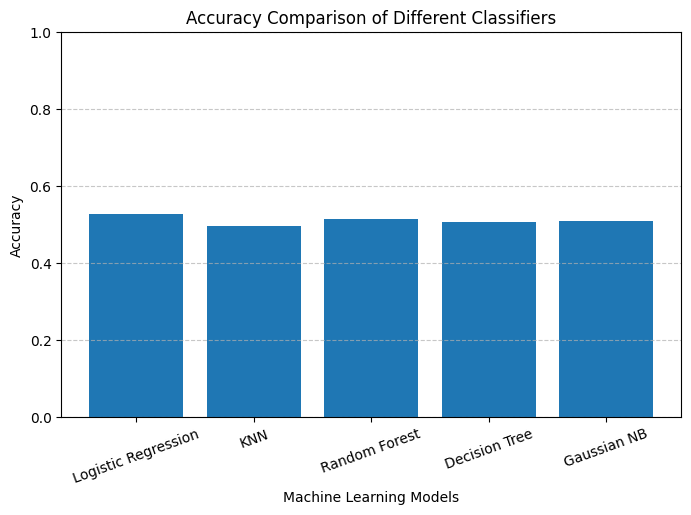

In [ ]:
# Accuracy bar chart আঁকা
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values())
plt.title("Accuracy Comparison of Different Classifiers")
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=20)
plt.show()


In [ ]:
import joblib
best = max(results, key=results.get)
joblib.dump(models[best], f"{best.replace(' ', '_')}_best.pkl")
print(f"💾 Best model saved: {best}")


💾 Best model saved: Logistic Regression



===== Logistic Regression =====
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



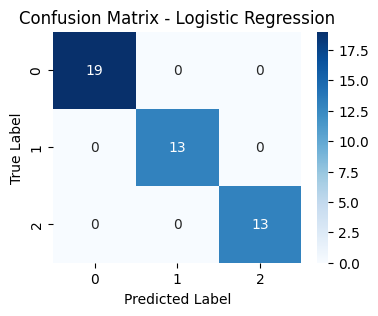


===== SVM (RBF Kernel) =====
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



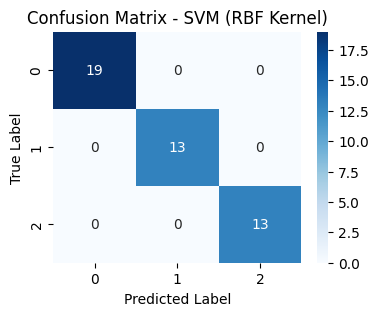


===== Gaussian NB =====
Accuracy: 0.9778
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



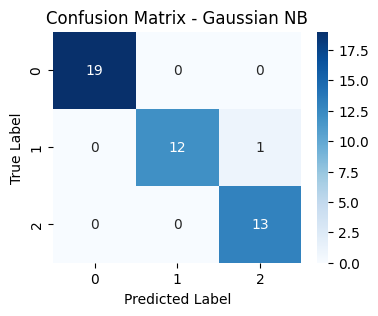


===== KNN =====
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



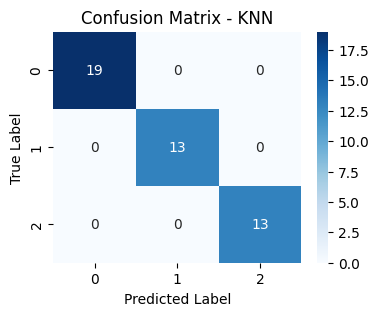


===== Decision Tree =====
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



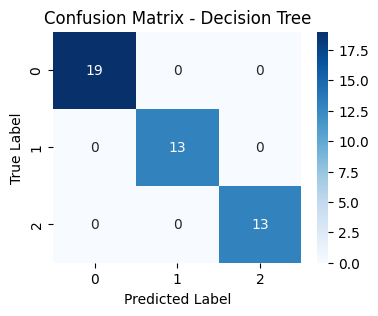


===== Random Forest =====
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



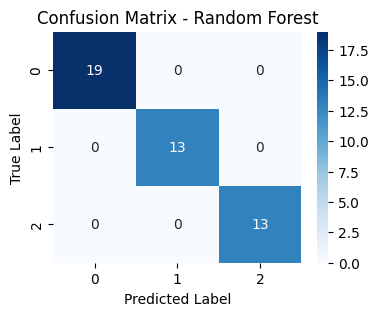

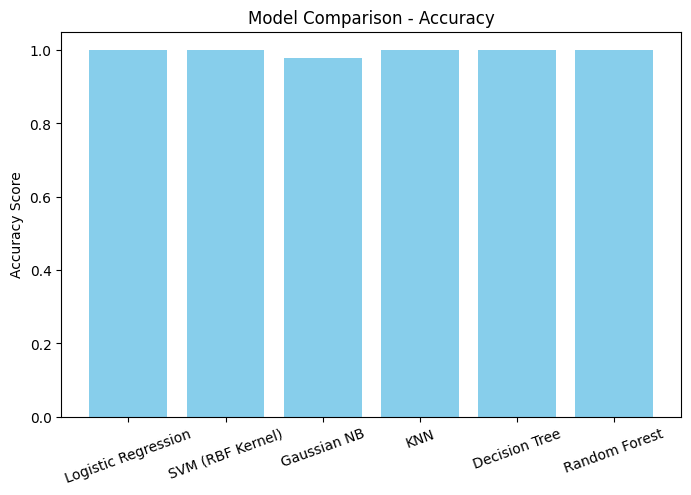

In [ ]:
# ==============================
# Import Libraries
# ==============================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# ==============================
# Example: If you already have your dataset
# (Replace these with your actual data)
# ==============================
# Example dummy dataset (remove this part if your data is ready)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# ==============================
# Initialize Models
# ==============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "Gaussian NB": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# ==============================
# Train & Evaluate Models
# ==============================
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n===== {name} =====")
    print("Accuracy:", round(acc, 4))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# ==============================
# Compare All Model Accuracies (Bar Chart)
# ==============================
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=20)
plt.show()


In [ ]:
# =============================================
# STEP 2: Import ML Models
# =============================================
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# =============================================
# STEP 3: Train and Evaluate Classifiers
# =============================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gaussian NB": GaussianNB()
}

results = {}

for name, clf in models.items():
    print(f"\n🔹 Training {name}...")
    clf.fit(train_features, train_labels)
    preds = clf.predict(val_features)
    acc = accuracy_score(val_labels, preds)
    results[name] = acc
    print(f"✅ {name} Accuracy: {acc:.4f}")



🔹 Training Logistic Regression...
✅ Logistic Regression Accuracy: 0.5276

🔹 Training KNN...
✅ KNN Accuracy: 0.4969

🔹 Training Random Forest...
✅ Random Forest Accuracy: 0.5157

🔹 Training Decision Tree...
✅ Decision Tree Accuracy: 0.5056

🔹 Training Gaussian NB...
✅ Gaussian NB Accuracy: 0.5086


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


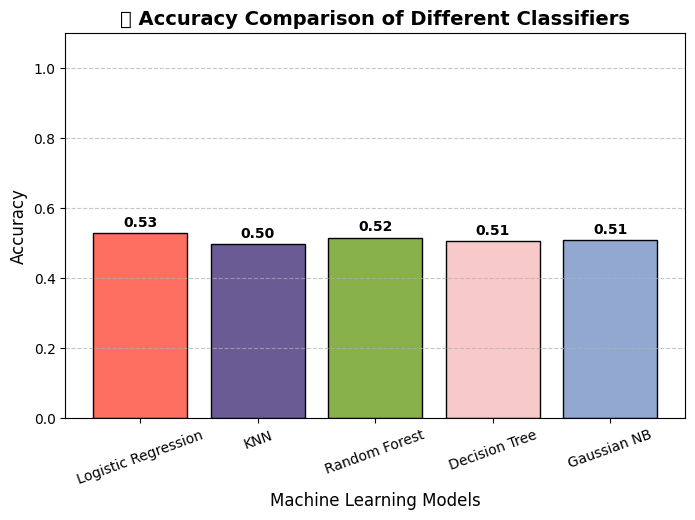

In [ ]:
# =============================================
# STEP 4: Accuracy Bar Chart with Colors
# =============================================
# রঙের list
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']

plt.figure(figsize=(8,5))
bars = plt.bar(results.keys(), results.values(), color=colors, edgecolor='black')

# Accuracy label উপরে দেখানো
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Title, Label, Grid
plt.title("🎯 Accuracy Comparison of Different Classifiers", fontsize=14, fontweight='bold')
plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=20)
plt.show()
